In [63]:
from scipy import misc
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import scipy
import os
import cv2
from torch.optim import Adam, SGD
from torch.nn import CrossEntropyLoss

In [51]:
from PIL import *
Image

<module 'PIL.Image' from '/home/g/.local/lib/python3.6/site-packages/PIL/Image.py'>

In [52]:
version = scipy.version.version

print(version)

1.4.1


### Load list of Image files

In [111]:
relative_images_folder_path = "./VOC2007/JPEGImages"
file_list = []
files  = os.walk(relative_images_folder_path)
for filename in files:
    for file in filename[2]:
        file_list.append(f'{relative_images_folder_path}/{file}')
        
#print(file_list)
data = [(cv2.imread(fname)) for fname in file_list[0:5]]


In [112]:
data[0].shape

(375, 500, 3)

In [113]:

image_x = np.array([cv2.resize(x, dsize=( 72, 72), interpolation=cv2.INTER_CUBIC) for x in data])

image_y_mid = np.array([cv2.resize(x, dsize=( 144, 144), interpolation=cv2.INTER_CUBIC) for x in data])

y_large_train = np.array([cv2.resize(x, dsize=( 288, 288), interpolation=cv2.INTER_CUBIC) for x in data])


In [114]:
file_list[0:10]

['./VOC2007/JPEGImages/000632.jpg',
 './VOC2007/JPEGImages/007322.jpg',
 './VOC2007/JPEGImages/009666.jpg',
 './VOC2007/JPEGImages/003218.jpg',
 './VOC2007/JPEGImages/009194.jpg',
 './VOC2007/JPEGImages/005177.jpg',
 './VOC2007/JPEGImages/002589.jpg',
 './VOC2007/JPEGImages/007482.jpg',
 './VOC2007/JPEGImages/002004.jpg',
 './VOC2007/JPEGImages/001832.jpg']

In [115]:
image_x.shape

(5, 72, 72, 3)

In [325]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3,padding = 1)
        self.conv2 = nn.Conv2d(64, 64, 3,padding = 1)
        self.upsanpling = nn.UpsamplingBilinear2d(scale_factor=2)
        self.conv3 = nn.Conv2d(64, 3, 1)

    def forward(self, x):
       
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.upsanpling(x)
        x = self.conv3(x)
        return x


In [326]:
model_without_batchnorm = Net()
# defining the optimizer (Adam optimizer)
optimizer = Adam(model_without_batchnorm.parameters(), lr=0.01)
# defining the loss function
#criterion = CrossEntropyLoss()
criterion = nn.MSELoss()



In [327]:
def train(model, num_epochs = 100):
    loss_list = []
    loss_val_list = []
    acc_list = []
   
    model.train()

    items = np.arange(image_x.shape[0])
    image_x1 = np.moveaxis(image_x, -1, 1).astype(np.float32)
    #image_x1 = image_x.astype(np.float32)
    
    torch_x=torch.tensor(image_x1)
    torch_y_mid1=torch.tensor(np.moveaxis(image_y_mid, -1, 1).astype(np.float32))
    for epoch in range(num_epochs):
        
        optimizer.zero_grad()
        # Run the forward pass
        
        outputs = model.forward(torch_x)
        loss = criterion(outputs, torch_y_mid1)
        # Backprop and perform Adam optimisation

        loss.backward()
        optimizer.step()
       
        
        print(f' epoch {epoch}' )
        
        if (epoch) % 10 == 0:
            x1 =np.moveaxis(outputs[0].detach().numpy().astype(np.int32),0,-1)
            x2 =np.moveaxis(outputs[1].detach().numpy().astype(np.int32),0,-1)
            x3 =np.moveaxis(outputs[2].detach().numpy().astype(np.int32),0,-1)
           
            plt.imshow(x1 )
            plt.show()
            plt.imshow(x2 )
            plt.show()
            plt.imshow(x3 )
            plt.show()
          
        
              

    
    return loss_list, loss_val_list, acc_list

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 0


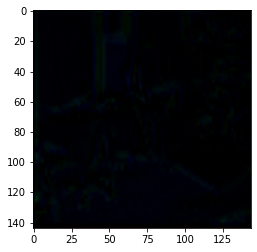

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


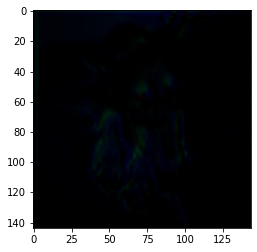

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


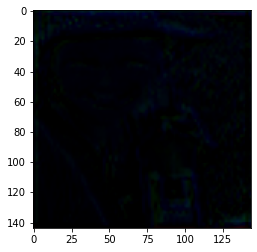

 epoch 1
 epoch 2
 epoch 3
 epoch 4
 epoch 5
 epoch 6
 epoch 7
 epoch 8
 epoch 9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 10


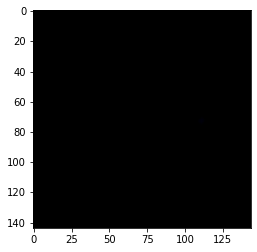

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


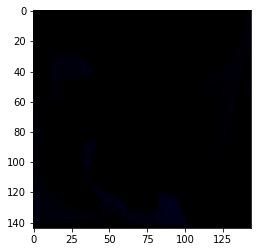

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


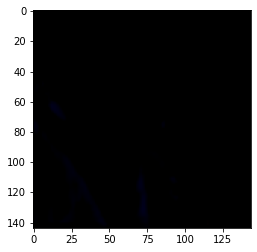

 epoch 11
 epoch 12
 epoch 13
 epoch 14
 epoch 15
 epoch 16
 epoch 17
 epoch 18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 19
 epoch 20


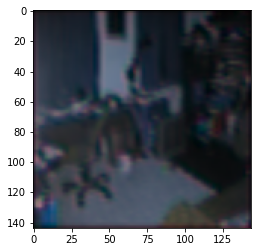

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


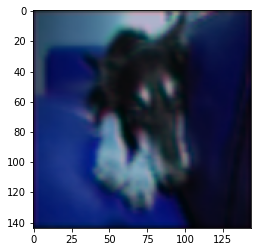

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


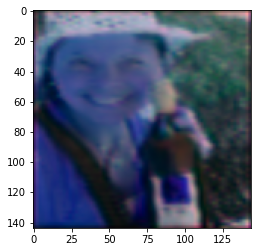

 epoch 21
 epoch 22
 epoch 23
 epoch 24
 epoch 25
 epoch 26
 epoch 27
 epoch 28
 epoch 29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 30


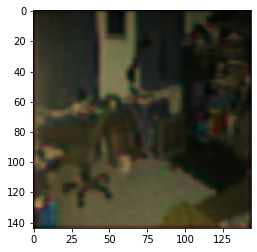

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


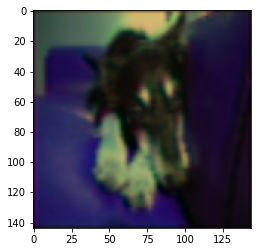

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


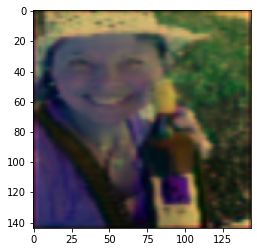

 epoch 31
 epoch 32
 epoch 33
 epoch 34
 epoch 35
 epoch 36
 epoch 37
 epoch 38


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 39
 epoch 40


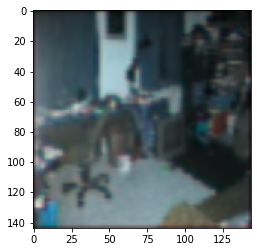

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


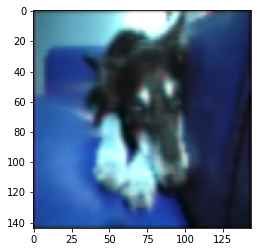

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


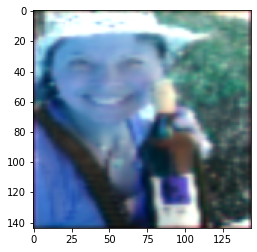

 epoch 41
 epoch 42
 epoch 43
 epoch 44
 epoch 45
 epoch 46
 epoch 47
 epoch 48
 epoch 49
 epoch 50


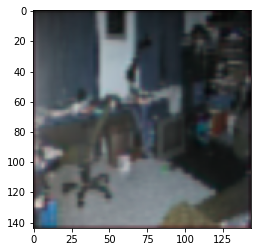

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


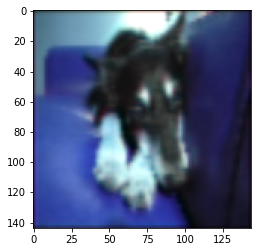

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


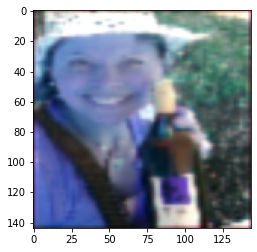

 epoch 51
 epoch 52
 epoch 53
 epoch 54
 epoch 55
 epoch 56
 epoch 57
 epoch 58
 epoch 59
 epoch 60


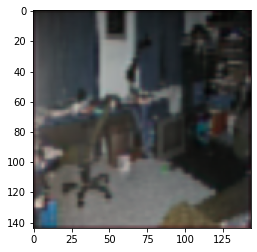

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


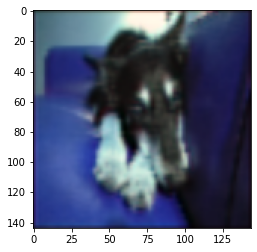

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


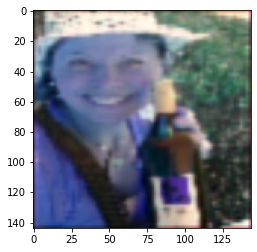

 epoch 61
 epoch 62
 epoch 63
 epoch 64
 epoch 65
 epoch 66
 epoch 67
 epoch 68
 epoch 69
 epoch 70


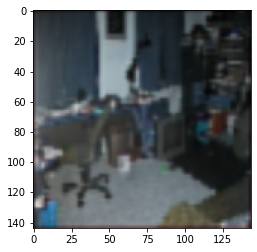

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


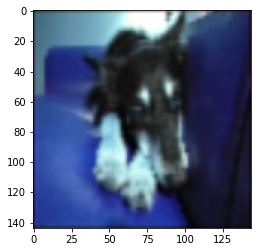

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


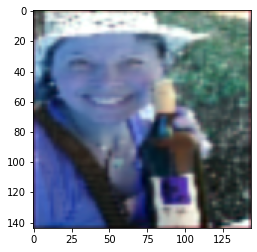

 epoch 71
 epoch 72
 epoch 73
 epoch 74
 epoch 75
 epoch 76
 epoch 77
 epoch 78
 epoch 79
 epoch 80


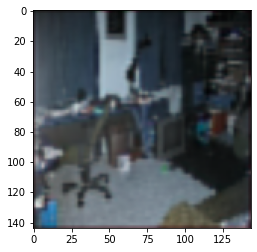

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


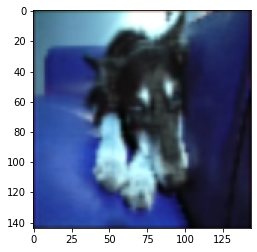

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


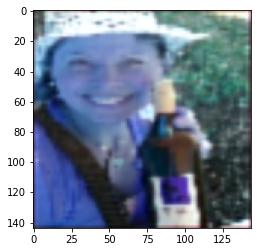

 epoch 81
 epoch 82
 epoch 83
 epoch 84
 epoch 85
 epoch 86
 epoch 87
 epoch 88
 epoch 89
 epoch 90


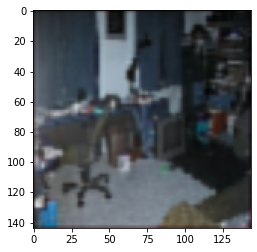

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


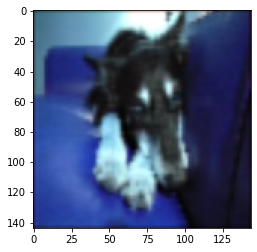

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


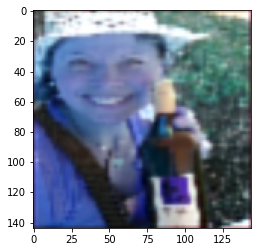

 epoch 91
 epoch 92
 epoch 93
 epoch 94
 epoch 95
 epoch 96
 epoch 97
 epoch 98
 epoch 99
 epoch 100


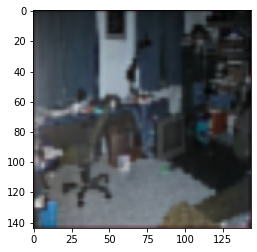

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


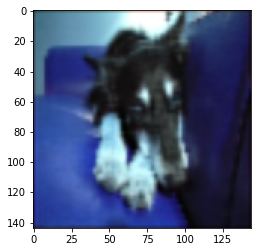

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


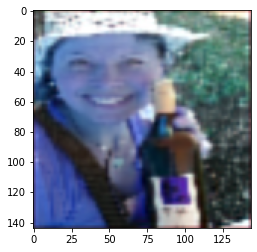

 epoch 101
 epoch 102
 epoch 103
 epoch 104
 epoch 105
 epoch 106
 epoch 107
 epoch 108
 epoch 109
 epoch 110


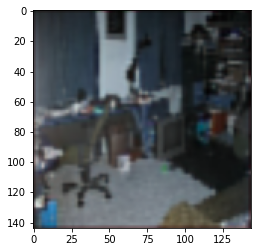

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


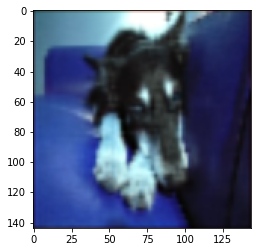

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


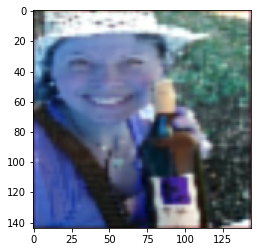

 epoch 111
 epoch 112
 epoch 113
 epoch 114
 epoch 115
 epoch 116
 epoch 117
 epoch 118
 epoch 119
 epoch 120


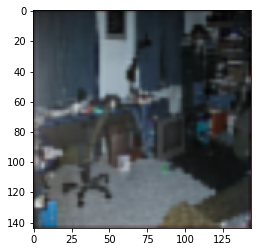

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


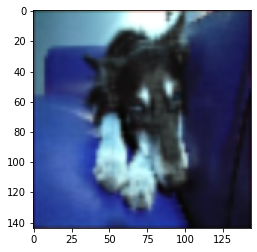

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


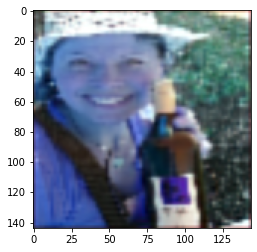

 epoch 121
 epoch 122
 epoch 123
 epoch 124
 epoch 125
 epoch 126
 epoch 127
 epoch 128
 epoch 129
 epoch 130


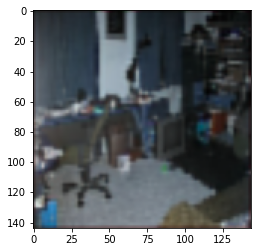

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


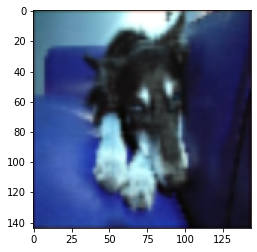

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


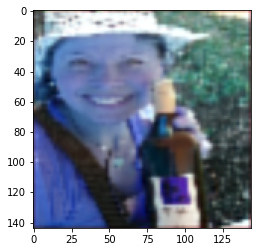

 epoch 131
 epoch 132
 epoch 133
 epoch 134
 epoch 135
 epoch 136
 epoch 137
 epoch 138
 epoch 139


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 140


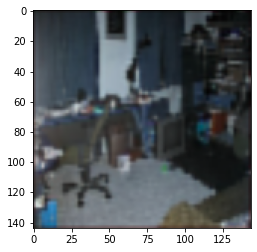

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


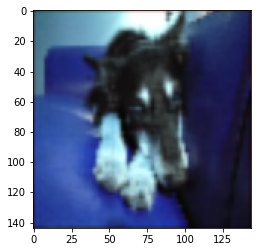

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


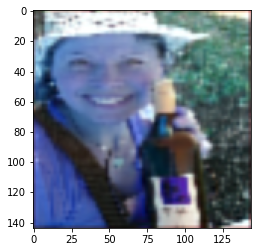

 epoch 141
 epoch 142
 epoch 143
 epoch 144
 epoch 145
 epoch 146
 epoch 147
 epoch 148
 epoch 149


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 150


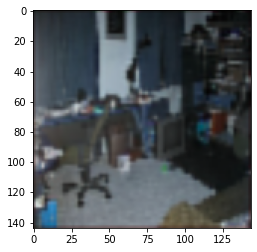

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


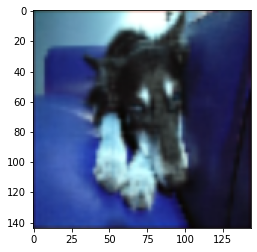

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


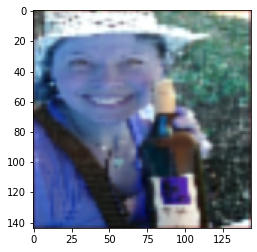

 epoch 151
 epoch 152
 epoch 153
 epoch 154
 epoch 155
 epoch 156
 epoch 157
 epoch 158
 epoch 159


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 160


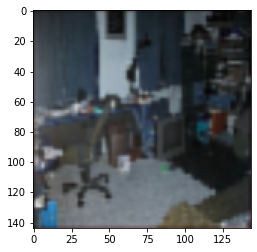

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


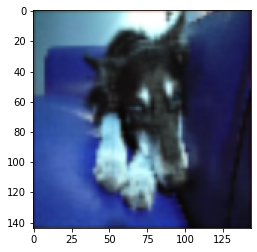

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


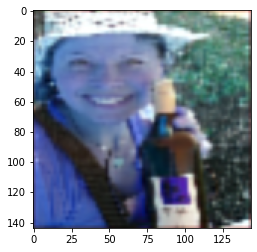

 epoch 161
 epoch 162
 epoch 163
 epoch 164
 epoch 165
 epoch 166
 epoch 167
 epoch 168
 epoch 169


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 170


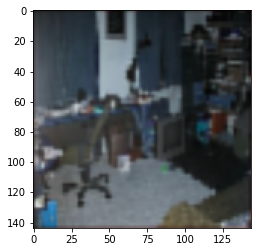

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


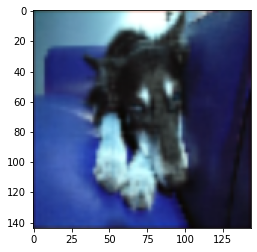

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


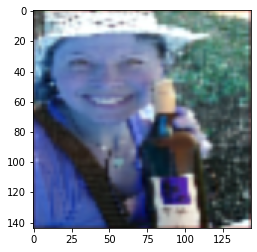

 epoch 171
 epoch 172
 epoch 173
 epoch 174
 epoch 175
 epoch 176
 epoch 177
 epoch 178
 epoch 179


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 180


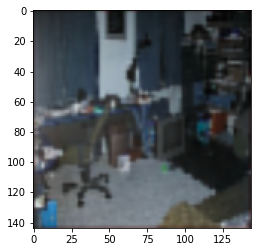

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


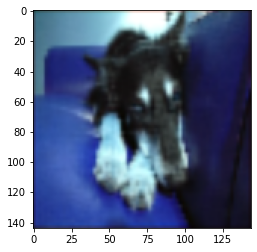

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


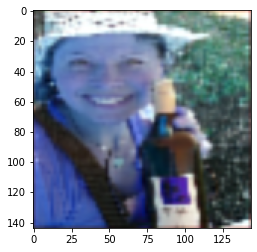

 epoch 181
 epoch 182
 epoch 183
 epoch 184
 epoch 185
 epoch 186
 epoch 187
 epoch 188
 epoch 189


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 190


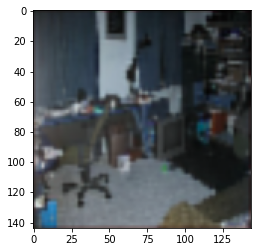

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


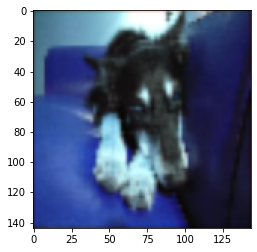

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


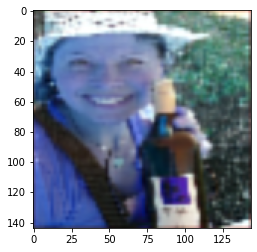

 epoch 191
 epoch 192
 epoch 193
 epoch 194
 epoch 195
 epoch 196
 epoch 197
 epoch 198
 epoch 199


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 200


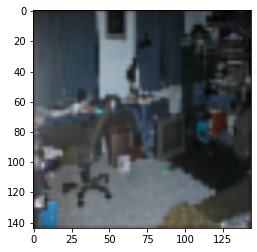

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


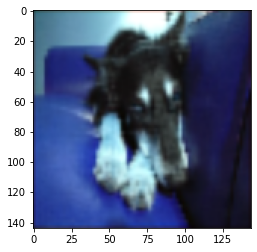

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


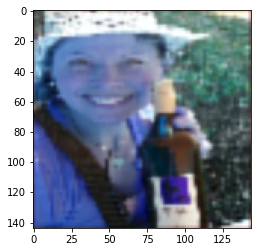

 epoch 201
 epoch 202
 epoch 203
 epoch 204
 epoch 205
 epoch 206
 epoch 207
 epoch 208
 epoch 209
 epoch 210


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


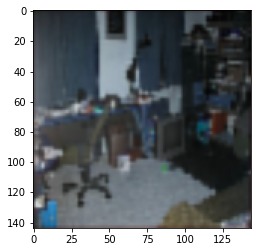

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


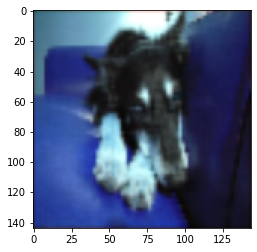

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


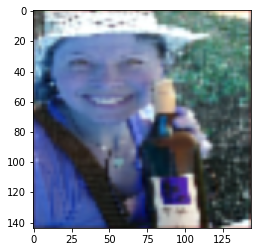

 epoch 211
 epoch 212
 epoch 213
 epoch 214
 epoch 215
 epoch 216
 epoch 217
 epoch 218


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 219
 epoch 220


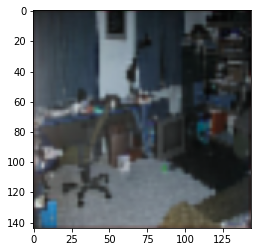

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


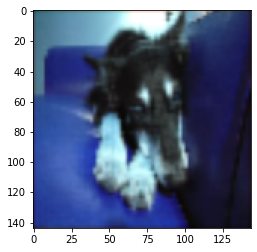

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


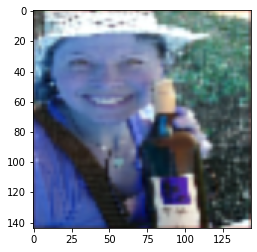

 epoch 221
 epoch 222
 epoch 223
 epoch 224
 epoch 225
 epoch 226
 epoch 227
 epoch 228
 epoch 229
 epoch 230


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


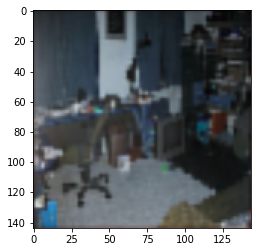

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


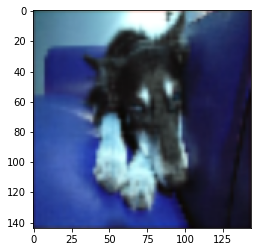

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


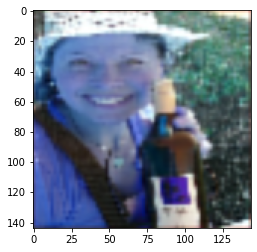

 epoch 231
 epoch 232
 epoch 233
 epoch 234
 epoch 235
 epoch 236
 epoch 237
 epoch 238
 epoch 239


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 240


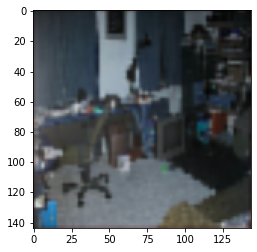

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


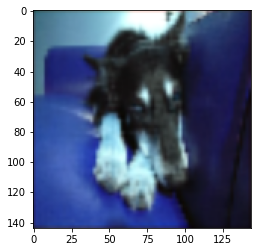

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


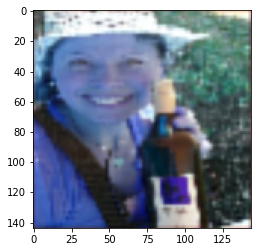

 epoch 241
 epoch 242
 epoch 243
 epoch 244
 epoch 245
 epoch 246
 epoch 247
 epoch 248
 epoch 249


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 250


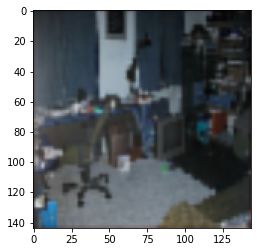

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


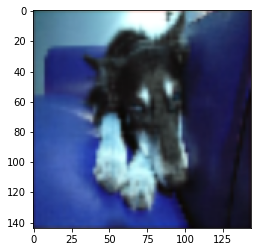

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


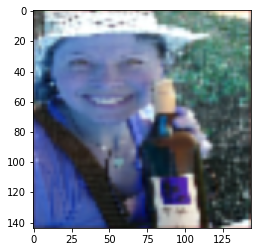

 epoch 251
 epoch 252
 epoch 253
 epoch 254
 epoch 255
 epoch 256
 epoch 257
 epoch 258
 epoch 259
 epoch 260


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


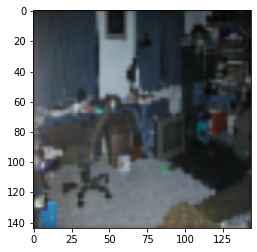

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


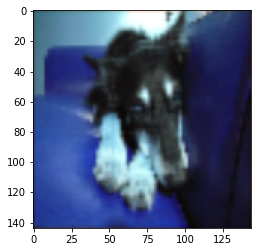

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


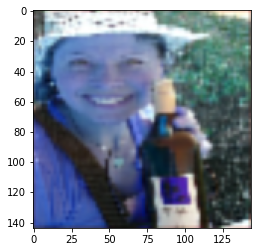

 epoch 261
 epoch 262
 epoch 263
 epoch 264
 epoch 265
 epoch 266
 epoch 267
 epoch 268
 epoch 269


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 270


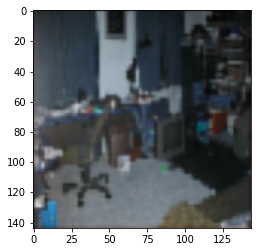

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


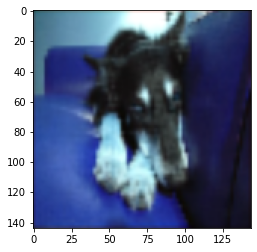

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


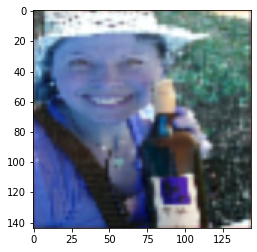

 epoch 271
 epoch 272
 epoch 273
 epoch 274
 epoch 275
 epoch 276
 epoch 277
 epoch 278
 epoch 279
 epoch 280


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


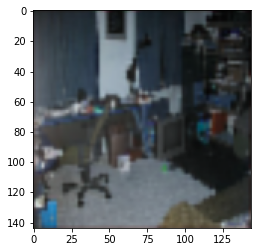

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


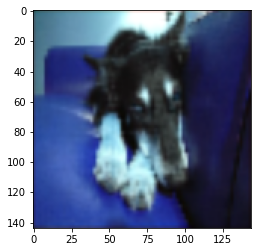

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


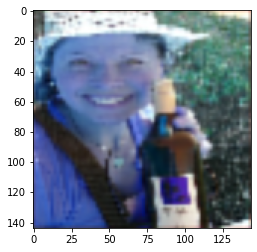

 epoch 281
 epoch 282
 epoch 283
 epoch 284
 epoch 285
 epoch 286
 epoch 287
 epoch 288
 epoch 289


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 epoch 290


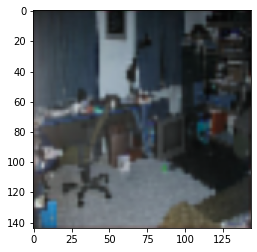

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


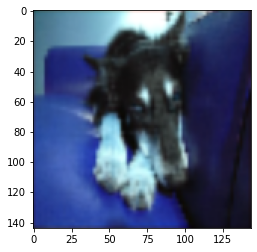

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


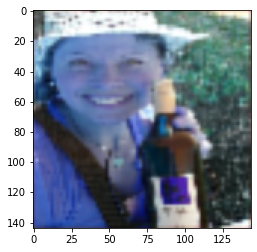

 epoch 291
 epoch 292
 epoch 293
 epoch 294
 epoch 295
 epoch 296
 epoch 297
 epoch 298
 epoch 299


In [328]:
loss_list, loss_val_list, acc_list = train(model_without_batchnorm, 300) 

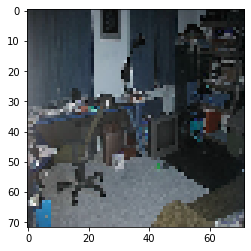

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([10, 3, 144, 144])
(10, 144, 144, 3)


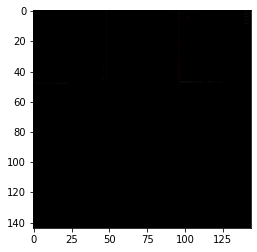

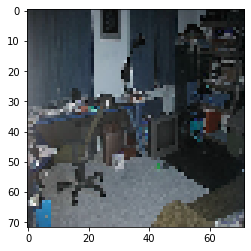

(72, 72, 3)


In [49]:
plt.imshow(image_x[0])
plt.show()
image_x1 = image_x.reshape(100, 3, 72, 72).astype(np.float32)
x_rr=torch.tensor(image_x1)
x1 = net.forward(x_rr)
print(x1.shape)
x2 = x1.detach().numpy().reshape(10, 144, 144, 3).astype(np.int32)
print(x2.shape)
plt.imshow(x2[0])
plt.show()
xx = image_x.reshape(10, 72, 72, 3)[0]
plt.imshow(xx)
plt.show()
print(xx.shape)

(5, 72, 72, 3)
(72, 72)
(5, 3, 72, 72)


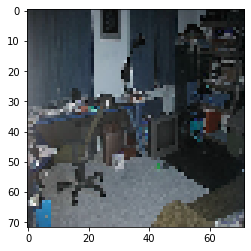

In [309]:
x = np.zeros((3,72,72))
x1 = image_x[0][:,:,0]
x2 = image_x[0][:,:,1]
x3 = image_x[0][:,:,2]
print(image_x.shape)
print(x1.shape)
x[0] = x1
x[1] = x2
x[2] = x3

#plt.imshow(xx )
#plt.show()

xx  = np.moveaxis(image_x, -1, 1)
print(xx.shape)
x  = np.moveaxis(xx, 1, -1)

x.shape
plt.imshow(x[0] )
plt.show()